# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Load & Explore Data

In [ ]:
#load data on dataframe
uploaded = files.upload()
df = pd.read_csv('/content/dataR1.csv')

Saving dataR1.csv to dataR1.csv


In [ ]:
#display dataframe
df.head()

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,M,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
1,M,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460
2,B,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602
3,B,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
4,B,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786


In [ ]:
#count of rows and columns
df.shape

(116, 10)

In [ ]:
#count number of null(empty) values
df.isna().sum()

Classification    0
Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
dtype: int64

In [ ]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [ ]:
# count of rows and columns
df.shape

(116, 10)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['Classification'].value_counts()

M    64
B    52
Name: Classification, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

Classification     object
Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
dtype: object

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0].values)  #iloc[rows,columns]

In [ ]:
#display df
df

,Classification,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,1,51,18.370000,105,6.030,1.561770,9.6200,12.760000,3.21000,513.660
1,1,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460
2,0,66,31.238590,82,4.181,0.845677,16.2247,4.267105,3.29175,634.602
3,0,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720
4,0,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
...,...,...,...,...,...,...,...,...,...,...
111,1,71,27.915519,104,18.200,4.668907,53.4997,1.656020,49.24184,256.001
112,1,48,31.250000,199,12.162,5.969920,18.1314,4.104105,53.63080,1698.440
113,1,42,29.296875,98,4.172,1.008511,12.2617,6.695585,53.67170,1041.843
114,1,85,27.688778,196,51.814,25.050342,70.8824,7.901685,55.21530,1078.359


# Data Visualisation


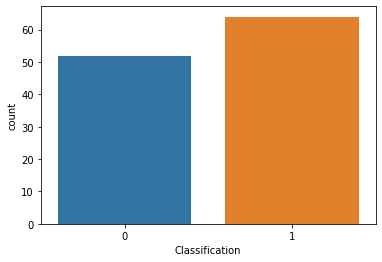

In [ ]:
#graph showing the 
sns.countplot(x='Classification',data=df)

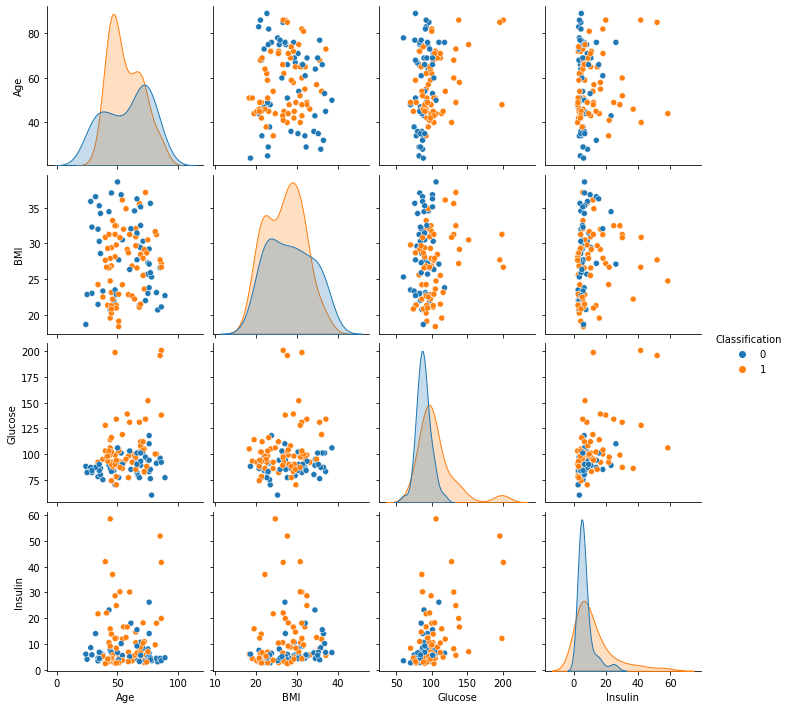

In [ ]:
sns.pairplot(df.iloc[:,0:5],hue='Classification')

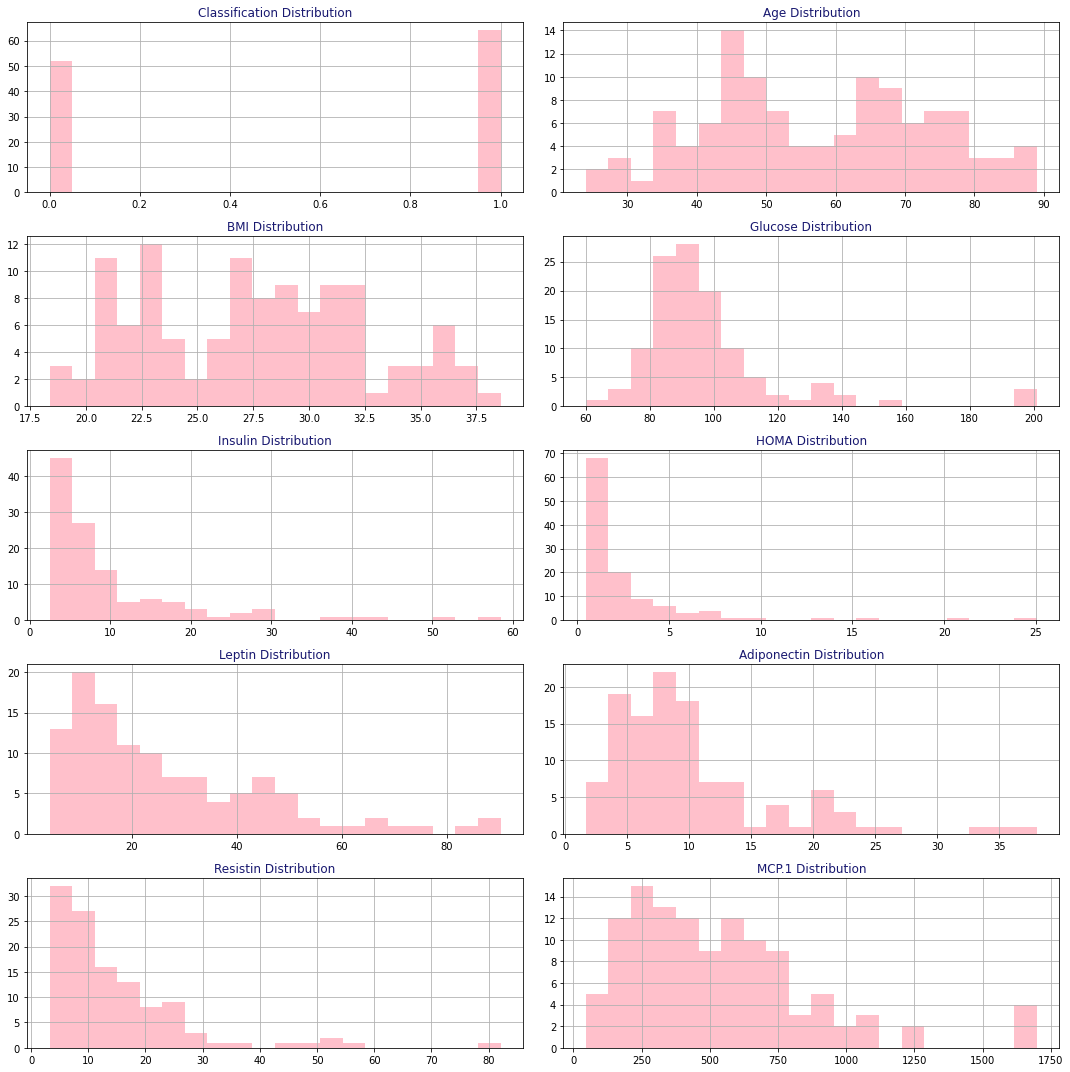

In [ ]:
def draw_histogram(df, features, rows, cols):
  fig = plt.figure(figsize=(15,15))
  for i, feature in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='pink') 
    ax.set_title(feature + " Distribution",color='midnightblue')
  fig.tight_layout()
  plt.show()
  print('\n\n')
draw_histogram(df,df.columns,5,2)

# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets
X = df.iloc[:,1:].values      #Independent Set 
Y = df.iloc[:,0].values       #Dependent Set

In [ ]:
#Splitting datasets into training(85%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#print data
X_train

array([[ 1.99809021e+00, -9.56718848e-01, -9.15050652e-01,
        -5.41814049e-01, -4.99138354e-01, -1.01950650e+00,
        -7.06197794e-01, -1.66752620e-01,  2.08431894e+00],
       [ 3.53116130e-01, -9.65212902e-01, -2.61760483e-01,
        -6.58943137e-01, -5.25523302e-01, -8.70511765e-01,
         8.75385919e-02, -3.37006932e-01,  4.73960156e-01],
       [-3.17058497e-01, -1.79738756e+00,  3.04424331e-01,
        -4.11886086e-01, -3.23165384e-01, -8.83085507e-01,
         3.01741296e-01, -9.05793808e-01, -8.11325070e-02],
       [ 5.96815994e-01,  7.41420467e-01, -3.48865839e-01,
        -1.00155938e-01, -1.94494611e-01,  9.83580997e-01,
        -3.63041447e-02,  6.26975230e-01,  1.63522044e+00],
       [-1.23093299e+00,  1.84236695e-01, -5.23076550e-01,
        -5.75265651e-01, -4.91026079e-01, -6.00340675e-01,
        -2.83049174e-01, -4.54144440e-01, -2.11527603e-02],
       [ 7.79590892e-01,  9.45949363e-01, -2.18207805e-01,
        -4.70062786e-01, -4.06073611e-01, -5.993031

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

# Performance Evaluation

[[7 1]
 [1 9]]


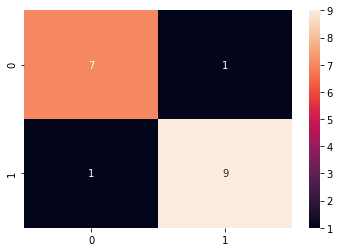

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print('Accuracy of this prediction model is {0:.2f}%'.format(accuracy_score(Y_test,predictions)*100))

Accuracy of this prediction model is 88.89%


In [ ]:
print(Y_test)

[0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0]


In [ ]:
print(predictions)

[0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 0]
